In [1]:
#loading EDA libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# EDA

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
print(f'There are {sum(df.duplicated())} duplicated rows')

There are 0 duplicated rows


In [6]:
#checking null values
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [7]:
#getting info and checking data types for anomalies.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [8]:
# Number of unique in each column
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [9]:
# Number of people with zero mortage
print(f"{len(df[df['Mortgage']==0])} people do not a have mortgage")

3462 people do not a have mortgage


In [10]:
# Number of people with zero credit card spending

In [11]:
print(f"{len(df[df['CCAvg']==0])} people have zero credit card spending per month")

106 people have zero credit card spending per month


In [12]:
#values count for categorical variables
categorical_columns = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

for categorical_column in categorical_columns:
    print(f"value count for {categorical_column} column:")
    print(df[categorical_column].value_counts())
    print()

value count for Education column:
1    2096
3    1501
2    1403
Name: Education, dtype: int64

value count for Personal Loan column:
0    4520
1     480
Name: Personal Loan, dtype: int64

value count for Securities Account column:
0    4478
1     522
Name: Securities Account, dtype: int64

value count for CD Account column:
0    4698
1     302
Name: CD Account, dtype: int64

value count for Online column:
1    2984
0    2016
Name: Online, dtype: int64

value count for CreditCard column:
0    3530
1    1470
Name: CreditCard, dtype: int64



ID distribution diagram


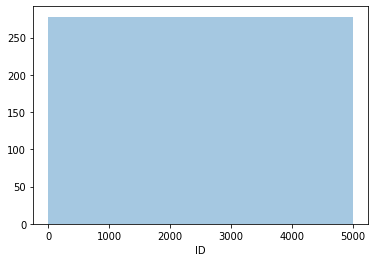

Age distribution diagram


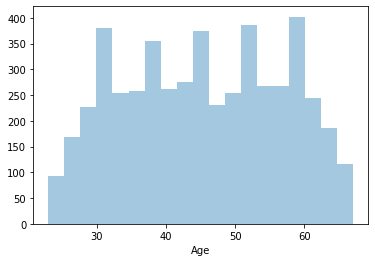

Experience distribution diagram


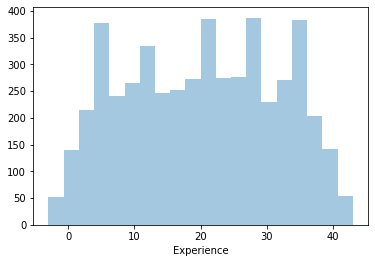

Income distribution diagram


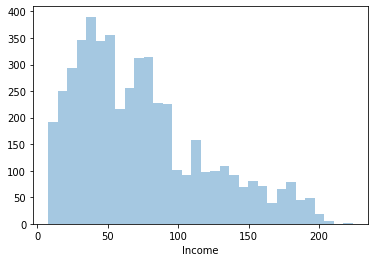

ZIP Code distribution diagram


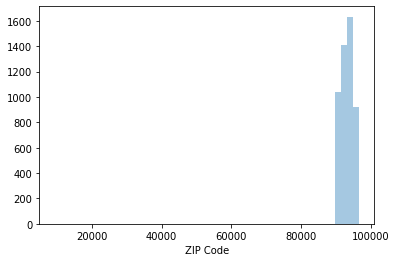

Family distribution diagram


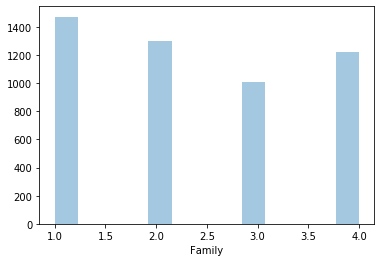

CCAvg distribution diagram


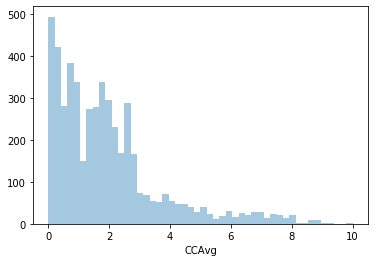

Mortgage distribution diagram


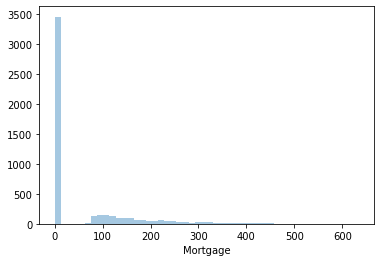

In [13]:
#univariate plot for all columns except categorical values and ID.
for column in list(df):
    if column not in categorical_columns:
        print(f'{column} distribution diagram')
        sns.distplot(df[column], kde=False)
        plt.show()

ID box plot


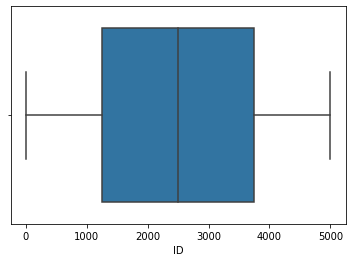

Age box plot


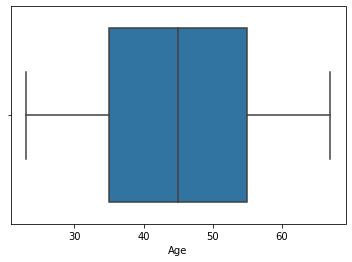

Experience box plot


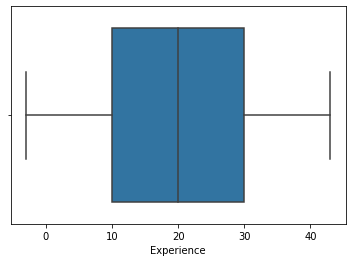

Income box plot


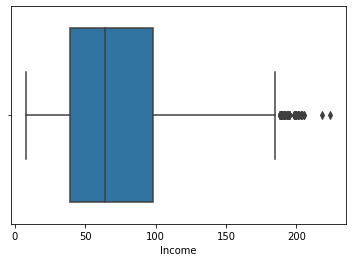

ZIP Code box plot


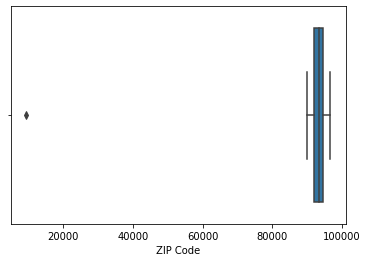

Family box plot


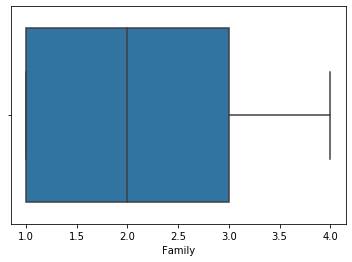

CCAvg box plot


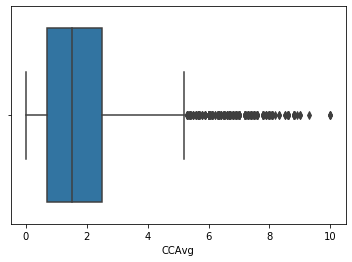

Mortgage box plot


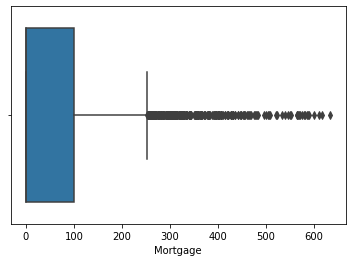

In [14]:
#univariate box plot for all columns except categorical values and ID.
for column in list(df):
    if column not in categorical_columns:
        print(f'{column} box plot')
        sns.boxplot(x=df[column])   
        plt.show()

## Findings from univariate analysis

* We have some negative values for experience, which needs to be addressed.
* Zip code is highly skewed and I dont't think it will add much value to prediction. I am considering dropping the Zip column
* ccAvg and mortgage are highly skewed but I think there are relevant to this problem.
* the income, mortgage and ccAVg columns has a lot outliers, and we will have to deal with those.
* I will drop the ID Column

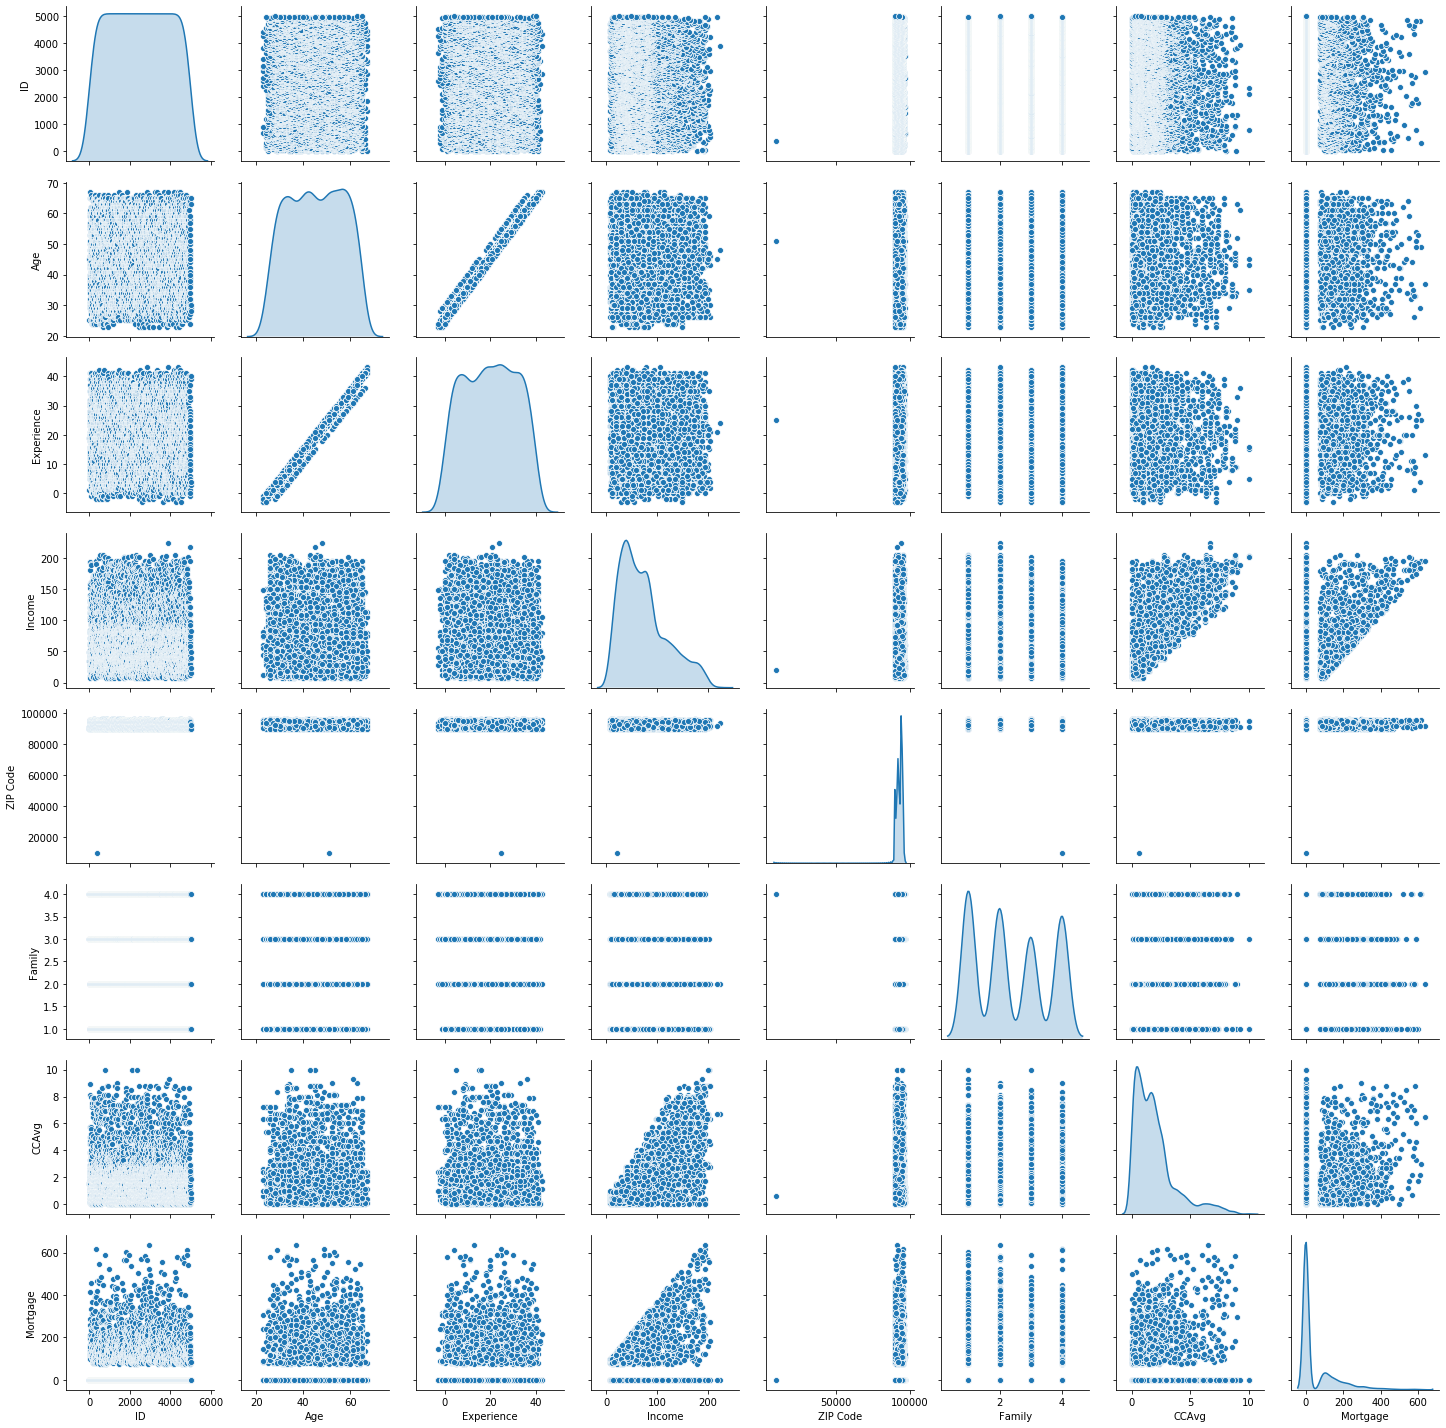

In [15]:
sns.pairplot(df.drop(categorical_columns, axis=1), diag_kind='kde')

## findings from bivariate analysis
* There is a strong relation between Age and Experience. Logistic Regression assumes that variables are independent; we will thus have to drop one column between Age and Experience. As experience seems corrupted with negative values, I will drop experience and keep Age instead.
* Family size does not really have a relation with anything. I will drop it.

## Data Model Decisions:

* I have decided to keep the outliers and I will correct them using different strategies.
* I have also decided to drop the ZIP Code for a first try,I might consider applying an exponential transformation at a later stage as I realise the area someone is living might have an influence on them approving the loan. but the Zip data is really skewed at the moment.
* I have also decided to drop Experience column
* Regarding the categorical columns, I have decided to apply one hot encoding only on Education as it is the only column with more than 2 possibilities. The rest of categorical values are fine as is


In [16]:
# Getting data model ready
# dropping unwanted columns
data_model_1 = df.drop(['ZIP Code', 'Experience', 'Family', 'ID'], axis=1)

#Manual Hot Encoding :) and dropping Education column
data_model_1['Education_Undergrad'] = df.apply(lambda x : 1 if x['Education'] == 1 else 0, axis=1)
data_model_1['Education_Graduate'] = df.apply(lambda x : 1 if x['Education'] == 2 else 0, axis=1)
data_model_1.drop('Education', axis=1, inplace=True)

#dealing with outliers

#Mortgage:
#Mortgage is highly skewed but we might have relevant insight using it. I will change Mortgage into a categorical
#variable. 0 indicating no mortgage and 1 indicating has a mortgage.

data_model_1['Mortgage'] = data_model_1['Mortgage'].apply(lambda x : 0 if x == 0 else 1)

#CCAvg:
##CCAvg is skewed to the right, after trying multiple approaches, I decided to first apply a log transformation,
#After applying the logarith tranformation, the data had a better shape with only 3 outliers. I decided to replace 
# outliers with the upper quartile

import numpy as np
from scipy import stats
from sklearn.preprocessing import FunctionTransformer  

log_transformer = FunctionTransformer(np.log1p)
data_model_1['CCAvg'] = log_transformer.fit_transform(data_model_1[['CCAvg']])  

temp = data_model_1['CCAvg']

Q1 = temp.quantile(0.25)
Q3 = temp.quantile(0.75)
IQR = Q3 - Q1
whisker  = Q3 + 1.5 * IQR
for i in zip(np.where(temp > whisker)[0]):
    temp.iloc[i] = whisker

data_model_1['CCAvg'] = temp

#Income:
#Income had 96 outliers. I decided to replace those with upper quartile
temp = data_model_1['Income']
Q1 = temp.quantile(0.25)
Q3 = temp.quantile(0.75)
IQR = Q3 - Q1
whisker  = Q3 + 1.5 * IQR

for i in zip(np.where(temp > whisker)[0]):
    temp.iloc[i] = whisker
data_model_1['Income'] = temp

#final data set for model
data_model_1.head()

/Users/kevin.becho/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/Users/kevin.becho/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/Users/kevin.becho/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Undergrad,Education_Graduate
0,25,49,0.955511,0,0,1,0,0,0,1,0
1,45,34,0.916291,0,0,1,0,0,0,1,0
2,39,11,0.693147,0,0,0,0,0,0,1,0
3,35,100,1.308333,0,0,0,0,0,0,0,1
4,35,45,0.693147,0,0,0,0,0,1,0,1


In [17]:
# defining a function to print out model results
def print_results(logreg, x_test, y_test, y_predict):
    print("Accuracy",logreg.score(x_test, y_test))
    print()
    print("Recall:",recall_score(y_test,y_predict))
    print()
    print("Precision:",precision_score(y_test,y_predict))
    print()
    print("F1 Score:",f1_score(y_test,y_predict))
    print()
    print('Confusion Matrix')
    print(draw_cm(y_test,y_predict))

# defining function to draw confusion matrix
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

# Model Building And Evaluation for entire data set :) 

Accuracy 0.9546666666666667

Recall: 0.6174496644295302

Precision: 0.8932038834951457

F1 Score: 0.7301587301587301

Confusion Matrix


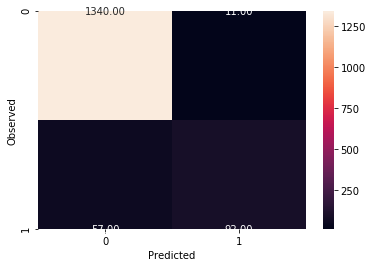

None


In [18]:
#splitting training data set from test data set.
X = data_model_1.drop('Personal Loan', axis=1)
Y = data_model_1['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

#Logistic Regression for prediction and getting model performance
logreg = LogisticRegression(random_state=42, solver='liblinear' )
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)
print_results(logreg, x_test, y_test, y_predict)

# Model Building And Evaluation for customers with deposit account

Accuracy 0.8791208791208791

Recall: 0.8

Precision: 0.9142857142857143

F1 Score: 0.8533333333333333

Confusion Matrix


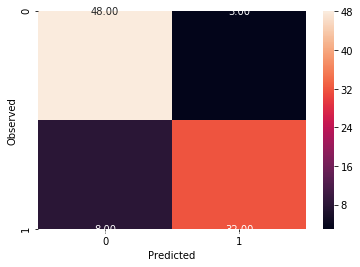

None


In [19]:
data_model_2 = data_model_1[data_model_1['CD Account'] == 1]
#splitting training data set from test data set.
X = data_model_2.drop('Personal Loan', axis=1)
Y = data_model_2['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

#Logistic Regression for prediction and getting model performance
logreg = LogisticRegression(random_state=42, solver='liblinear')
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)
print_results(logreg, x_test, y_test, y_predict)

## How could we make the model better?
The model could perform better if:
* we had more data of people with deposit account
* we can play around with solvers, penalty inverse of regularization (C), class_weight and figure out which values returns the best model
* we could try to apply a transformation on zip code to have that column being useful.

## Model Explanation
In this scenario, false negative are not wanted, we want to reduce them as much as possible. That means we do not want to miss any potential liability customer that we can convert. 

For this scenario, I think Recall is a good measure. Now with my model, recall is 80%, that means that using my model on a larger dataset, we will able to correctly target 80% of all liability customers that we can sell personal loans to. My model will still miss 20% of liability customers that could have been sold personal loans.